<a href="https://colab.research.google.com/github/the-datastrategist/colab-notebooks/blob/main/tds_quickstart_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tDS Notebook Quickstart

We use this notebook to get work up and running quickly. It contains most of the common steps required in any analysis:

- **Setting up** a notebook
- **Loading** data
- **Profiling** data
- **Visualizing** data

See more work and resources at [theDataStrategist.com](https://thedatastrategist.com).


# Setting up the notebook

Below are the variables and configurations used throughout the rest of the notebook.

### Authenticating Colab

In [ ]:
# Provide your credentials to the runtime
from google.colab import auth
auth.authenticate_user()

### Importing libraries

Here we import common libraries and global variables.

In [ ]:
# Import commonly-used libraries
import pandas as pd
import seaborn as sns

# Declare global variables
GOOGLE_PROJECT_ID = 'the-data-strategist'

### Loading Colab Settings

In [ ]:
# Colab includes the google.colab.data_table package
# that can be used to display large pandas dataframes
# as an interactive data table.
%load_ext google.colab.data_table
# %unload_ext google.colab.data_table


### Installing nbextensions

A collection of community-contributed extensions that add functionality to the Jupyter notebook. These extensions are mostly written in Javascript and will be loaded locally in your browser.

In [ ]:
!jupyter contrib nbextension install --user

# Loading data

## Loading BigQuery data

Now that we've set up our notebook, we can start querying data. Most often we're going to query data from BigQuery.

We'll use the Google BigQuery API rather than `pandas-gbq`. However, you can see instructions on using `pandas-gbq` [here](https://cloud.google.com/bigquery/docs/samples/bigquery-pandas-gbq-to-gbq-simple).

### Getting data from BigQuery

In [ ]:
from google.cloud import bigquery
import pandas as pd

# Initialized the BigQuery client
client = bigquery.Client(project=GOOGLE_PROJECT_ID)

# Specify SQL query
sql = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.products`
LIMIT 10
"""

# Run query and load to a dataframe
df_names = client.query(sql).to_dataframe()

In [ ]:
# View the first 5 rows of the dataframe
df_names.head()

id       cost category  \
0  27569  92.652563     Swim   
1  27445  24.719661     Swim   
2  27457  15.897600     Swim   
3  27466  17.850000     Swim   
4  27481  29.408001     Swim   

                                                name brand  retail_price  \
0     2XU Men's Swimmers Compression Long Sleeve Top   2XU    150.410004   
1         TYR Sport Men's Square Leg Short Swim Suit   TYR     38.990002   
2    TYR Sport Men's Solid Durafast Jammer Swim Suit   TYR     27.600000   
3  TYR Sport Men's Swim Short/Resistance Short Sw...   TYR     30.000000   
4                    TYR Alliance Team Splice Jammer   TYR     45.950001   

  department                               sku  distribution_center_id  
0        Men  B23C5765E165D83AA924FA8F13C05F25                       1  
1        Men  2AB7D3B23574C3DEA2BD278AFD0939AB                       1  
2        Men  8F831227B0EB6C6D09A0555531365933                       1  
3        Men  67317D6DCC4CB778AEB9219565F5456B                       1  
4        Men  213C888198806EF1A0E2BBF2F4855C6C                       1

In [ ]:
json_names = df_names.to_json()
json_names

'{"id":{"0":27569,"1":27445,"2":27457,"3":27466,"4":27481,"5":27487,"6":27510,"7":27529,"8":27537,"9":27552},"cost":{"0":92.6525625943,"1":24.7196611943,"2":15.8976002551,"3":17.8500000481,"4":29.4080005157,"5":15.6555899145,"6":22.5717504846,"7":22.8240001202,"8":24.3539110663,"9":19.3175505019},"category":{"0":"Swim","1":"Swim","2":"Swim","3":"Swim","4":"Swim","5":"Swim","6":"Swim","7":"Swim","8":"Swim","9":"Swim"},"name":{"0":"2XU Men\'s Swimmers Compression Long Sleeve Top","1":"TYR Sport Men\'s Square Leg Short Swim Suit","2":"TYR Sport Men\'s Solid Durafast Jammer Swim Suit","3":"TYR Sport Men\'s Swim Short\\/Resistance Short Swim Suit","4":"TYR Alliance Team Splice Jammer","5":"TYR Sport Men\'s 4-Inch Nylon Trainer-A Swim Suit","6":"TYR Sport Men\'s Solid Jammer Swim Suit","7":"TYR Sport Men\'s Poly Mesh Trainer Swim Suit","8":"TYR Sport Men\'s Alliance Durafast Splice Square Leg Swim Suit","9":"TYR Sport Men\'s Solid Racer Swim Suit"},"brand":{"0":"2XU","1":"TYR","2":"TYR","3":

### Loading data to BigQuery

See more about [loading to BigQuery](https://cloud.google.com/bigquery/docs/samples/bigquery-load-table-dataframe) here.

The accepted datatypes for `bigquery.enums.SqlTypeNames` can be found [here](https://cloud.google.com/bigquery/docs/reference/rest/v2/StandardSqlDataType#typekind).

In [ ]:
# Specify table_id to the ID of the table to create.
table_id = "the-data-strategist.test.california_housing_test"

# Get (or create) a dataframe
# This dataset is available as a sample dataset in Google Colab
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

In [ ]:
job_config = bigquery.LoadJobConfig(
    # Specify a (partial) schema. All columns are always written to the
    # table. The schema is used to assist in data type definitions.
    schema=[
        # Specify the type of columns whose type cannot be auto-detected.
        bigquery.SchemaField(
            "households",
            bigquery.enums.SqlTypeNames.INTEGER,
            description="The number of households in the geographic area"
            ),
        # Indexes are written if included in the schema by name.
        bigquery.SchemaField(
            "median_income",
            bigquery.enums.SqlTypeNames.FLOAT,
            description="The log of the median income"
            ),
    ],
    # Optionally, set the write disposition. BigQuery appends loaded rows
    # to an existing table by default, but with WRITE_TRUNCATE write
    # disposition it replaces the table with the loaded data.
    write_disposition="WRITE_TRUNCATE",
)

# Load dataframe to BigQuery
job = client.load_table_from_dataframe(df, table_id, job_config=job_config)
job.result()  # Wait for the job to complete.

# Get BigQuery table object
table = client.get_table(table_id)
print("Loaded {} rows and {} columns to {}".format(
    table.num_rows, len(table.schema), table_id
    )
)

Loaded 3000 rows and 9 columns to the-data-strategist.test.california_housing_test


## Loading Google Sheets data

### Authenticating Google Sheets

Our examples below use the open-source [`gspread`](https://github.com/burnash/gspread) library for interacting with Google Sheets. These examples are sourced from [External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb).

In [ ]:
import gspread
from google.auth import default
creds, _ = default()

# Authorize gspread
gc = gspread.authorize(creds)

### Creating a new Google Sheets sheet

Once you run this, it will be available in [https://docs.google.com/spreadsheets](https://docs.google.com/spreadsheets).

In [ ]:
# Create a new Google Sheet
# Find the sheet here: https://docs.google.com/spreadsheets
sheet = gc.create('My Dope Data 2')

# Share your worksheet with other users.
# spreadsheet.share('admin+qs@thedatastrategist.com', perm_type='user', role='writer')

### Loading data from Google Sheets to a Pandas DataFrame

More information about gsread can be found here:
- [Google Colab: io.ipynb](https://colab.research.google.com/notebooks/io.ipynb)
- [gspread Docs: Spreadsheet](https://docs.gspread.org/en/latest/api/models/spreadsheet.html)

In [ ]:
# Open a Google Sheets spreadsheet by ID
spreadsheet_id = '1VlIdq73MUBPSJdVcpZMGD1Dj-VuksY_CNH3r5DIe0cs'
spreadsheet = gc.open_by_key(spreadsheet_id)

# Open a Google Sheets spreadsheet by URL
spreadsheet_url = "https://docs.google.com/spreadsheets/d/{}".format(spreadsheet_id)
spreadsheet = gc.open_by_url(spreadsheet_url)

# # Get the Google Sheets spreadsheet by name
spreadsheet = gc.open('Liquidator Lookout: product map features')

In [ ]:
# Get the Worksheet by Spreadsheet tab index
worksheet = spreadsheet.get_worksheet(3)

# Get the Worksheet by name
# You can combine gc.open() with the line below to load the Worksheet directly.
worksheet = spreadsheet.worksheet('product_information')

# get_all_values gives a list of rows
rows = worksheet.get_all_values()

# The worksheet object has several functions that allow you to make edits to the
# Google Sheets worksheet. Examples:
# worksheet.append_row()
# worksheet.clear()

# Load rows (a list of lists) to a dataframe
df_products = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
df_products.head()

upc         brand             model            ean  \
0  490080907311  Westinghouse         DWM40F2G1  0490080907311   
1  663701835588       Samsung  SAUN40N5200AFXZA  0663701835588   
2  799559849870                                  0799559849870   
3  799559850258                                  0799559850258   
4  799559850944                                  0799559850944   

                                               title  
0  Westinghouse 40" Class 1080p 60Hz LED Hdtv - B...  
1  Samsung 40-inch Class N5200 Smart Full Hd Tv 2...  
2  Full Motion Tv Wall Mount Bracket Swivel Tilt ...  
3  Full Motion Tilt Swivel Tv Wall Mount For Hise...  
4  Tv Wall Mount Bracket Tilt For Hisense 32 40 4...

## Loading local data

### Uploading files from local file system

`files.upload` returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

# Plugin to load local files
uploaded = files.upload()

Saving socio_economic_data.csv to socio_economic_data.csv


In [ ]:
# Get a list of files that have been uploaded
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "socio_economic_data.csv" with length 2720897 bytes


### Downloading files from local file system

In [ ]:
from google.colab import files

# Download the file to your local computer
files.download('/content/sample_data/california_housing_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Create a sample file
with open('example.txt', 'w') as f:
  f.write('This is some dope content!')

# Download the file to your local computer
files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading Google Drive data

You can access files in Drive in a number of ways, including:
- Mounting your Google Drive in the runtime's virtual machine
- Using a wrapper around the API such as [PyDrive](https://pythonhosted.org/PyDrive/)
- Using the [native REST API](https://developers.google.com/drive/v3/web/about-sdk)


### Mounting Google Drive locally

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there. Once executed, you will be able to see the new file (`foo.txt`) at [https://drive.google.com/](https://drive.google.com/).

This only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options below.

In [ ]:
# Mount your Drive to local (ie Colab instance)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create and view a file
with open('/content/drive/My Drive/sample_file_4.txt', 'w') as f:
  f.write('Hello Google Drive! Hello, world!')

# View file from Google Drive
# You can also go to https://drive.google.com/drive/my-drive to view file
!cat /content/drive/My\ Drive/sample_file_4.txt

Hello Google Drive! Hello, world!

In [ ]:
# End the mount session
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


### Using the Drive REST API

In order to use the Drive API, we must first authenticate and construct an API client. With this client, we can use any of the functions in the [Google Drive API reference](https://developers.google.com/drive/v3/reference/). Examples follow.


In [ ]:
# In order to use the Drive API, we must first authenticate and construct an API client.
from google.colab import auth
auth.authenticate_user()

# Initialize an API client
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

#### Drive REST API: Creating a new Drive file with data from Python

Upload it using the [`files.create`](https://developers.google.com/drive/v3/reference/files/create) method. Further details on uploading files are available in the [developer documentation](https://developers.google.com/drive/v3/web/manage-uploads).

After executing the cell below, you will see a new file named 'Sample file' at [https://drive.google.com/](https://drive.google.com/).

In [ ]:
 # Create a sample local file to upload
 with open('/tmp/example.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/example.txt contains:')
!cat /tmp/to_upload.txt


In [ ]:
# Upload the file using the `files.create` method
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Sample file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/to_upload.txt',
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))


#### Drive REST API: Downloading data from a Drive file into Python

Download the file we uploaded above. In order to download a different file, set file_id above to the ID of that file, which will look like "1uBtlaggVyWshwcyP6kEI-y_W3P8D26sz".

In [ ]:
file_id = created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False

while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))


## Google Cloud Storage

You can access Google Cloud Storage (or GCS) via
1. gsutil
2. Google Python API

In [ ]:
# Authenticate user
from google.colab import auth
auth.authenticate_user()

# Specify tyour Google Project ID
project_id = 'the-data-strategist'

In [ ]:
# Create a unique bucket name
# Use uuid to create a universally unique ID
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())
print(bucket_name)

colab-sample-bucket-13075cc8-5242-11ee-900f-0242ac1c000c


#### Using gsutil

##### Uploading a file

1. Configure gsutil to use the project we specified above by using gcloud.
2. Make a bucket to which we'll upload the file ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/mb))
3. Copy the file to our new bucket ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/cp)).
4. Dump the contents of our newly copied file to make sure everything worked ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/cat)).


Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
`https://console.cloud.google.com/storage/browser?project={project_id}`

In [ ]:
# Configure gsutil to use the project we specified above by using gcloud.
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
# Make a bucket to which we'll upload the file
!gsutil mb gs://{bucket_name}

# Copy the file to our new bucket
!gsutil cp /content/sample_data/mnist_test.csv gs://{bucket_name}/

# Dump the contents of our newly copied file to make sure everything worked
# !gsutil cat gs://{bucket_name}/mnist_test.csv

##### Downloading a file

Finally, we'll download the file we just uploaded in the example above. It's as simple as reversing the order in the `gsutil cp` command.

In [ ]:
# Copy file from GCS to local directory
!gsutil cp gs://{bucket_name}/mnist_test.csv /content/mnist_test.csv

# Print the result to make sure the transfer worked.
# !cat /tmp/example.txt

Copying gs://colab-sample-bucket-0e71bbbc-509a-11ee-9ed4-0242ac1c000c/mnist_test.csv...
/ [1 files][ 17.4 MiB/ 17.4 MiB]                                                
Operation completed over 1 objects/17.4 MiB.                                     


#### Using Python API

1. Create the service client
2. Create a bucket in the Google project
3. Upload the file to our newly created bucket


##### Uploading a file

In [ ]:
# Create the service client.
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')


In [ ]:
# Create a bucket in the project specified above
# Use a different globally-unique bucket name from the gsutil example above.
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

In [ ]:
# Upload the file to our newly created bucket.
from googleapiclient.http import MediaFileUpload

media = MediaFileUpload('/tmp/to_upload.txt',
                        mimetype='text/plain',
                        resumable=True)

request = gcs_service.objects().insert(bucket=bucket_name,
                                       name='to_upload.txt',
                                       media_body=media)

response = None
while response is None:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, response = request.next_chunk()

print('Upload complete')

##### Downloading a file

In [ ]:
# Download the file
from apiclient.http import MediaIoBaseDownload

with open('/tmp/downloaded_from_gcs.txt', 'wb') as f:
  request = gcs_service.objects().get_media(bucket=bucket_name,
                                            object='to_upload.txt')
  media = MediaIoBaseDownload(f, request)

  done = False
  while not done:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = media.next_chunk()

print('Download complete')

In [ ]:
# Inspect the downloaded file
!cat /tmp/downloaded_from_gcs.txt


# Profiling Data

We often want to check whether our data makes sense. We'll review a set of libraries to profile our data.
- pandas.describe()
- pandas_profiling
- sweetviz

<br>

You can also reference this notebook on [Exploratory Data Analysis](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb).

In [ ]:
import pandas
import pandas_datareader.data as web

# Get stock OHLC data
df_ohlc = web.DataReader('SPY', 'stooq', start='01/01/2023', end='06/01/2023')

In [ ]:
df_ohlc.tail()

Open    High       Low   Close     Volume
Date                                                   
2023-01-09  390.37  393.70  387.6700  387.86   73978071
2023-01-06  382.61  389.25  379.4127  388.08  104189603
2023-01-05  381.72  381.84  378.7600  379.38   76970456
2023-01-04  383.18  385.88  380.0000  383.76   85934098
2023-01-03  384.37  386.43  377.8310  380.82   74850731

### pandas.describe()

In [ ]:
df_ohlc.describe()

Open        High         Low       Close        Volume
count  104.000000  104.000000  104.000000  104.000000  1.040000e+02
mean   404.075019  406.702567  401.704511  404.534135  8.616432e+07
std      9.828298    9.372831   10.168161    9.892011  2.428701e+07
min    381.720000  381.840000  377.831000  379.380000  4.922012e+07
25%    397.102500  399.380000  393.620000  396.842500  6.960031e+07
50%    406.335000  408.570000  404.300000  407.175000  8.510249e+07
75%    411.960000  413.847500  409.940000  412.502500  9.521213e+07
max    422.030000  422.920000  418.735000  421.820000  1.892530e+08

### pandas_profiling

In [ ]:
# Install pandas-profiling library
!pip install -U pandas-profiling

# Install Jupyter's nbextension
# Allows other extensions to be added to this notebook
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

# Run profiling report
profile = ProfileReport(df_ohlc, title="SPY Data", html={'style' : {'full_width':True}})

# Load to colab file
profile.to_file(output_file="pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Display the pandas_profiling output
# Use this code to view any HTML file
import IPython
IPython.display.HTML(filename='pandas_profiling.html')

### sweetviz

In [ ]:
# Install sweetviz library
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 98.2 MB/s eta 0:00:00


In [ ]:
# Import sweetviz librart
import sweetviz as sv

In [ ]:
my_report = sv.analyze(df_ohlc)
my_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



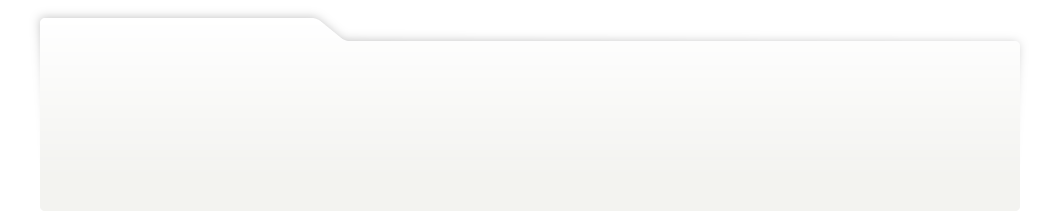
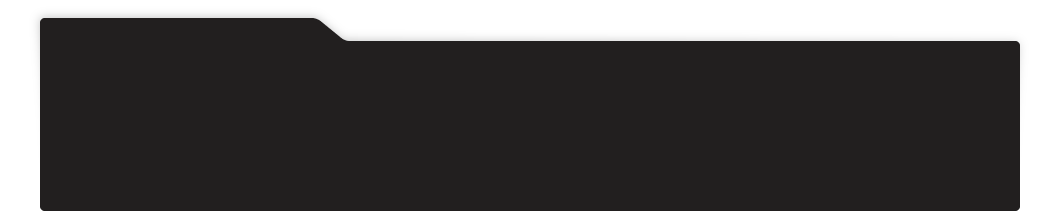
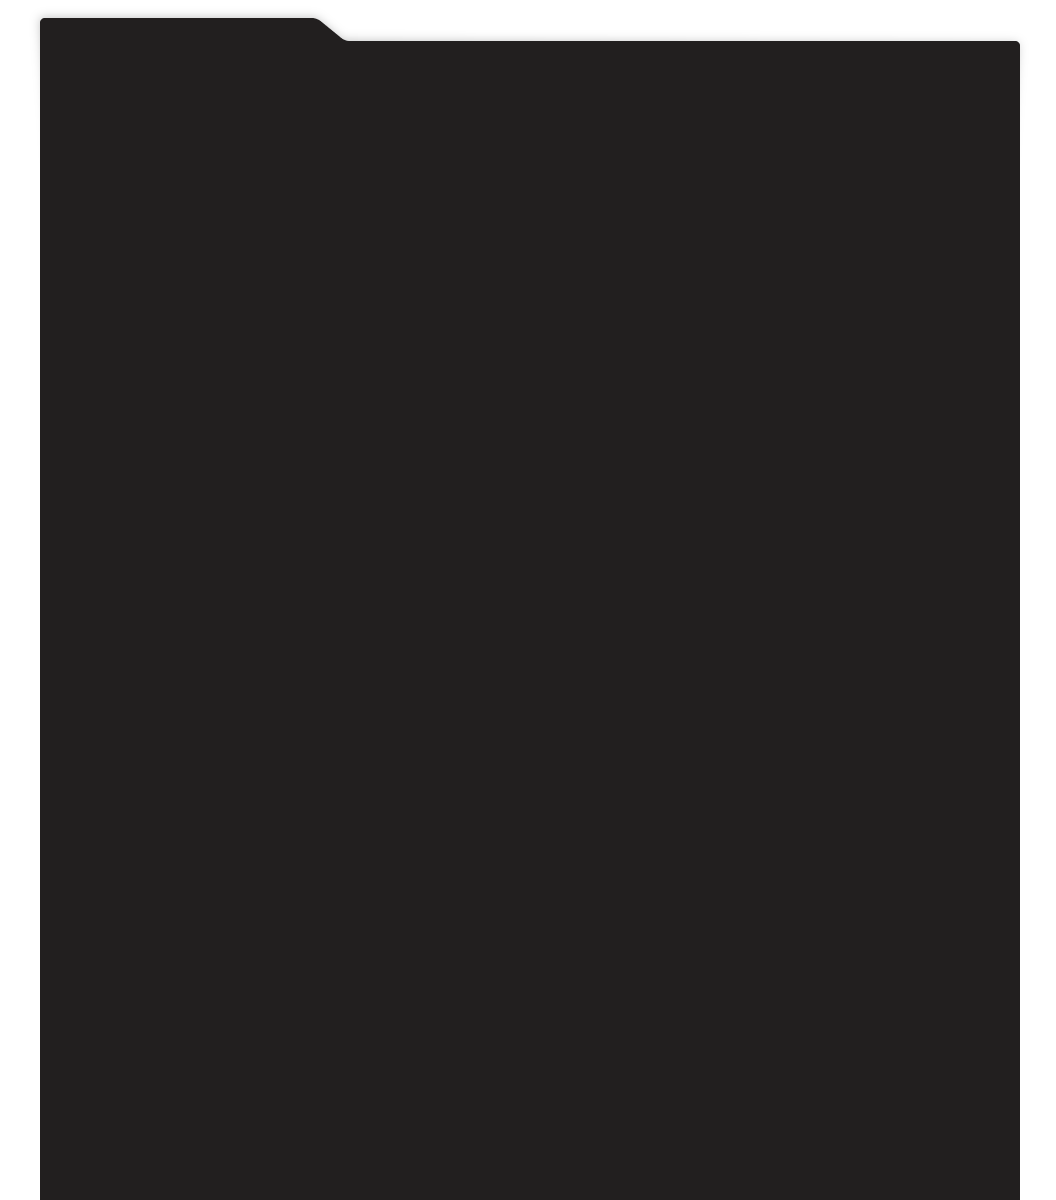
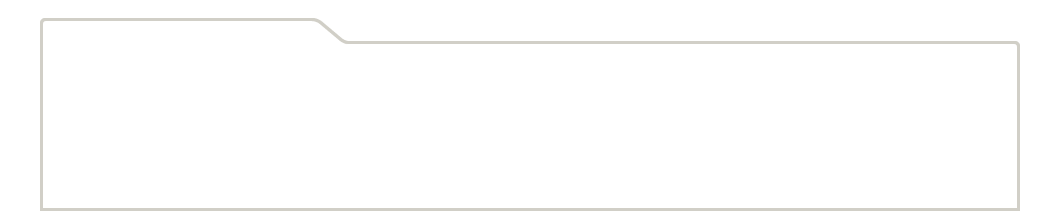
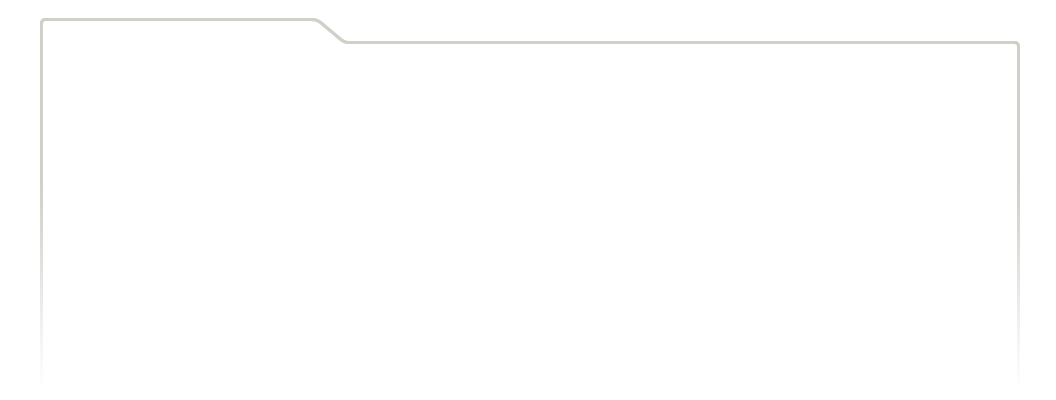
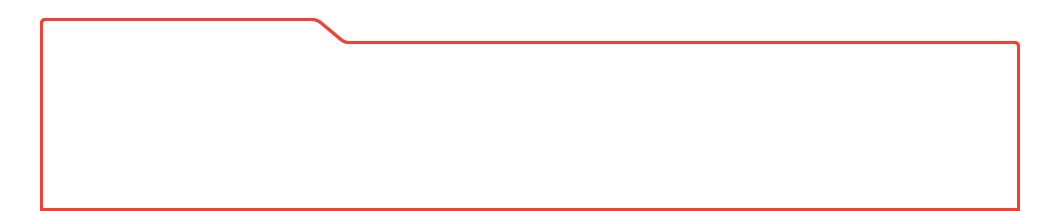
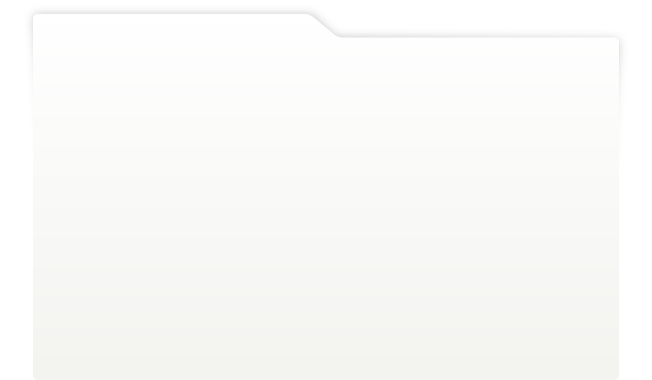
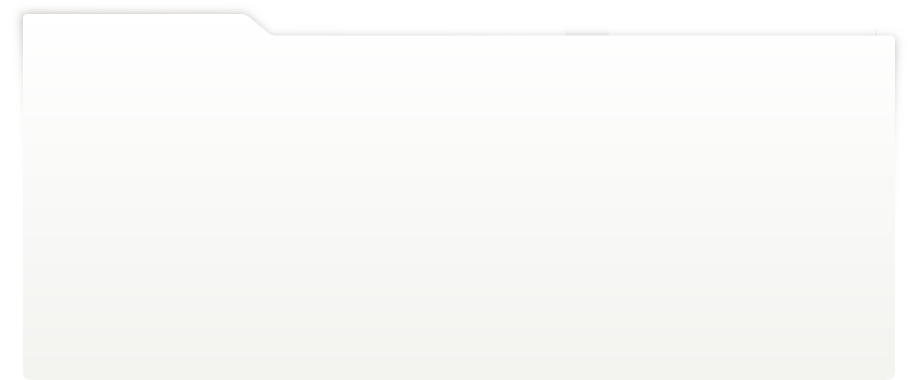
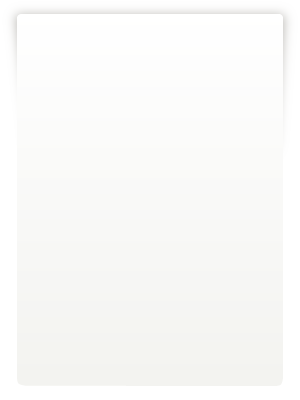
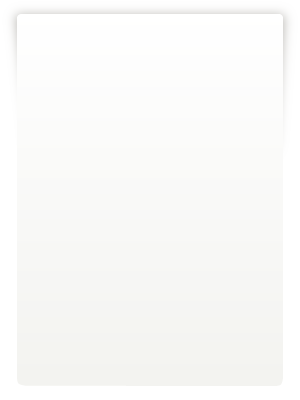
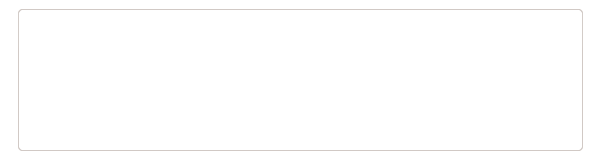
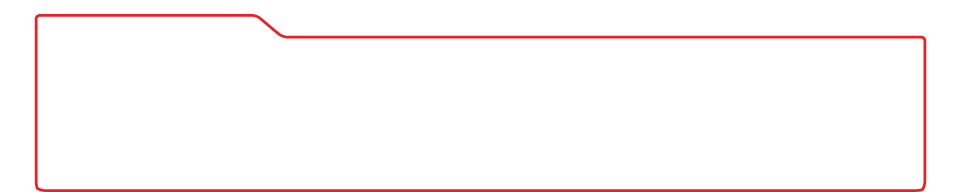
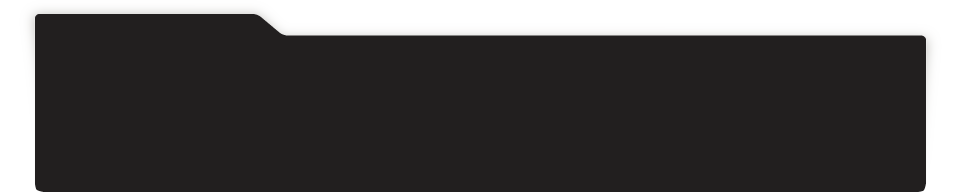
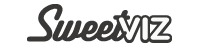
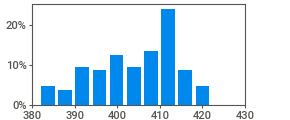
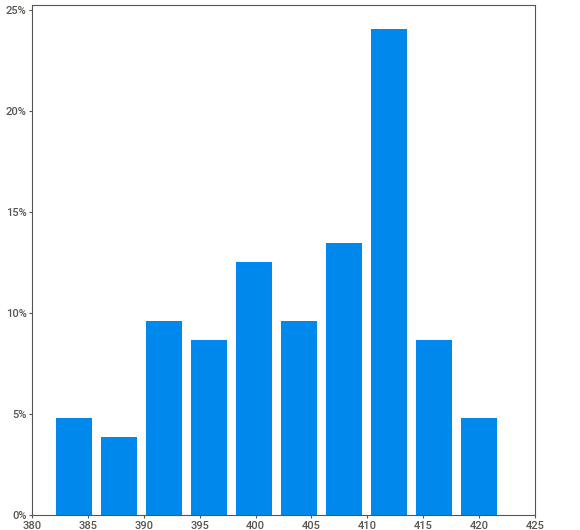
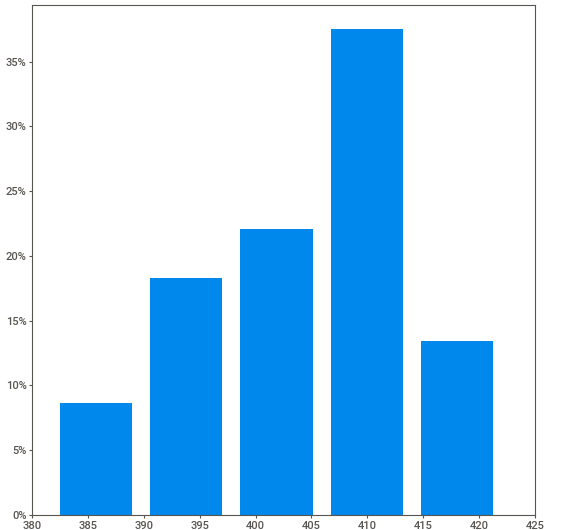
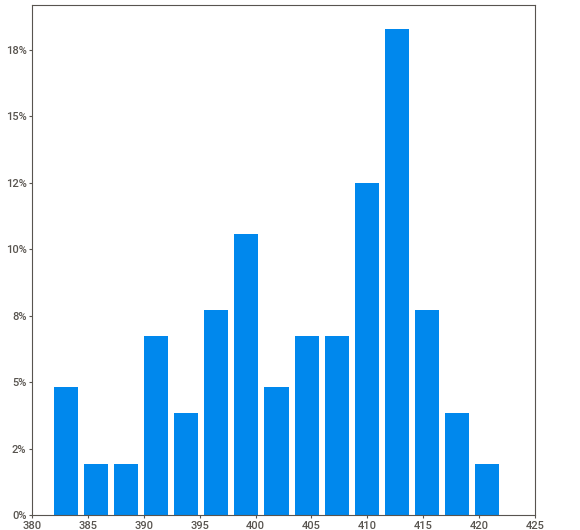
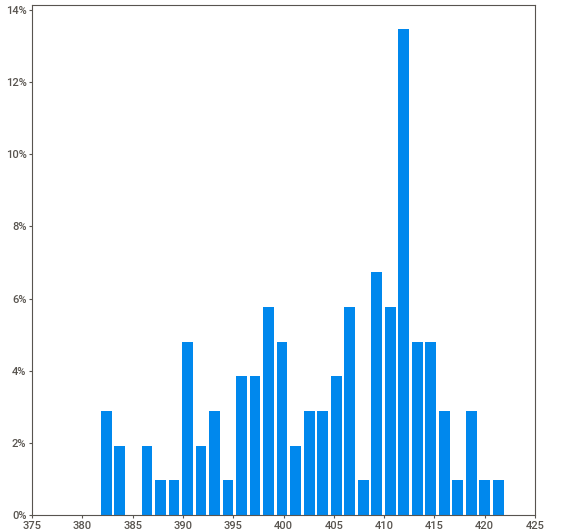
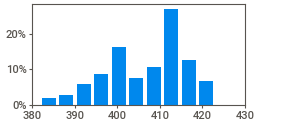
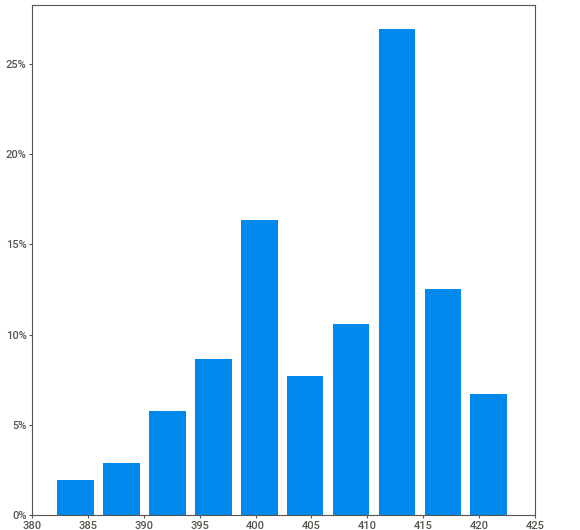
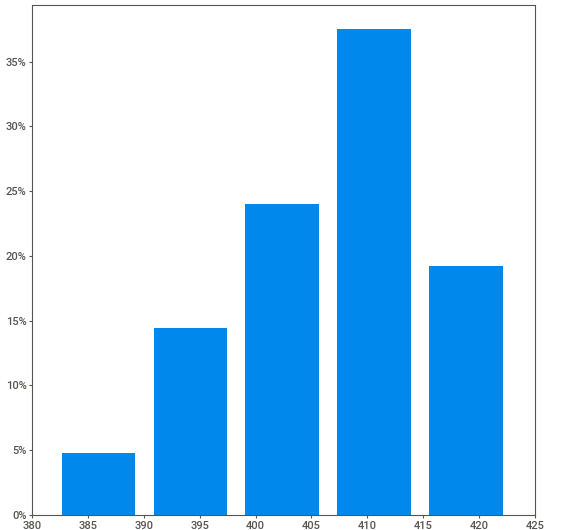
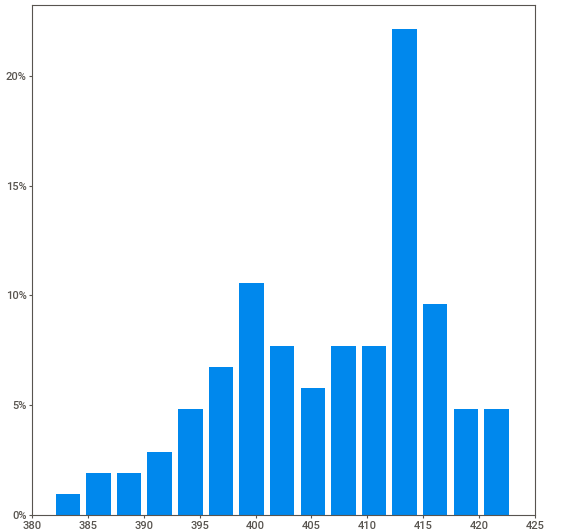
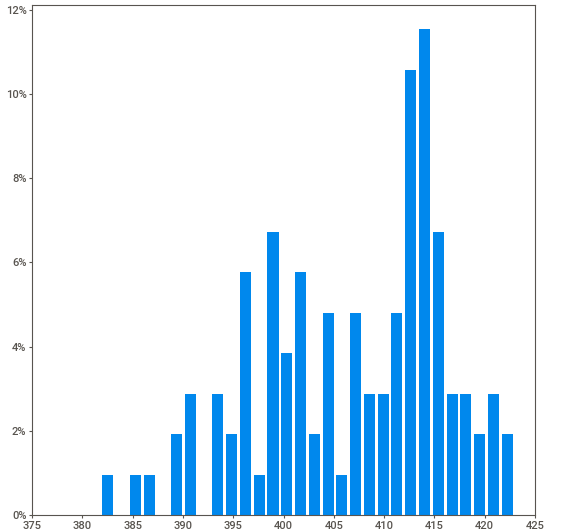
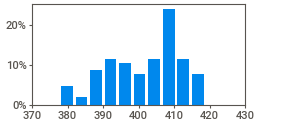
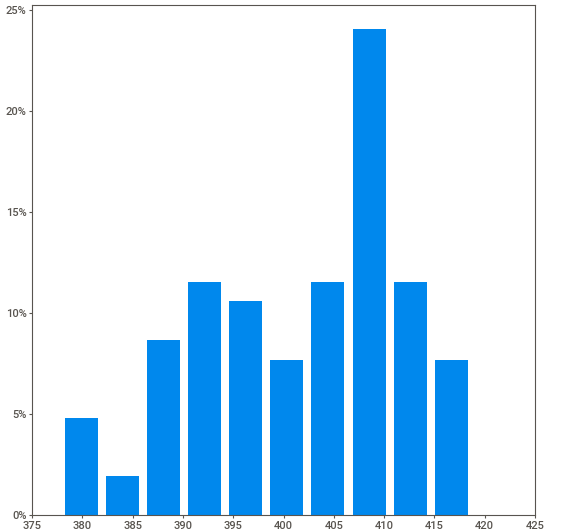
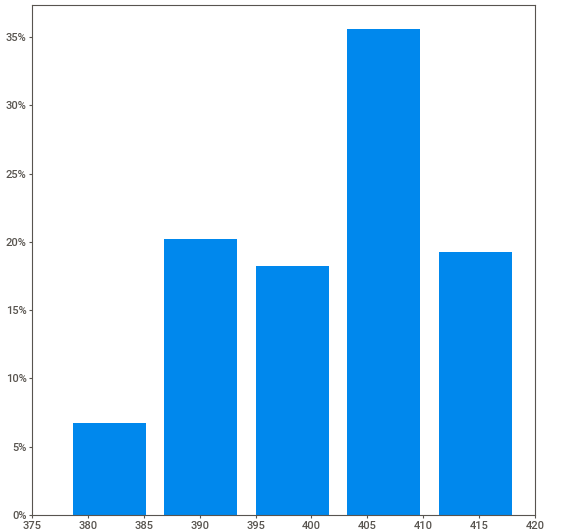
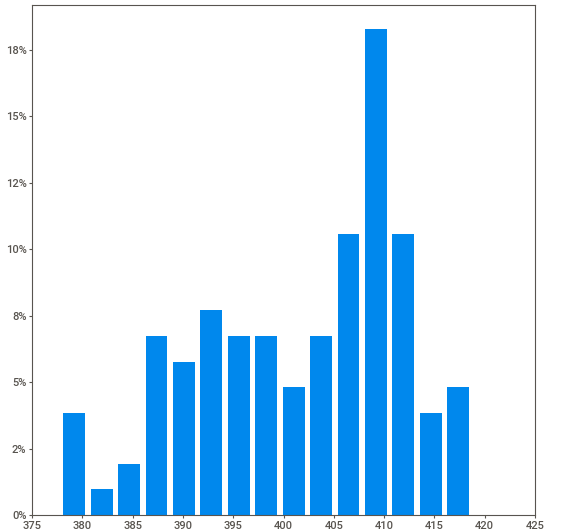
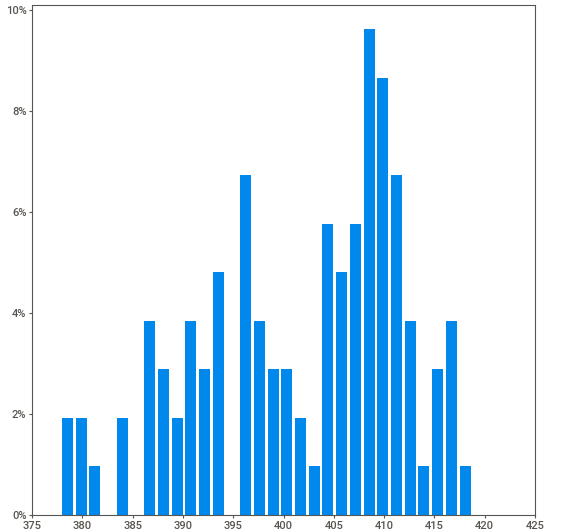
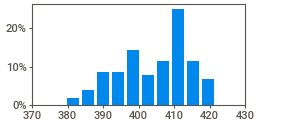
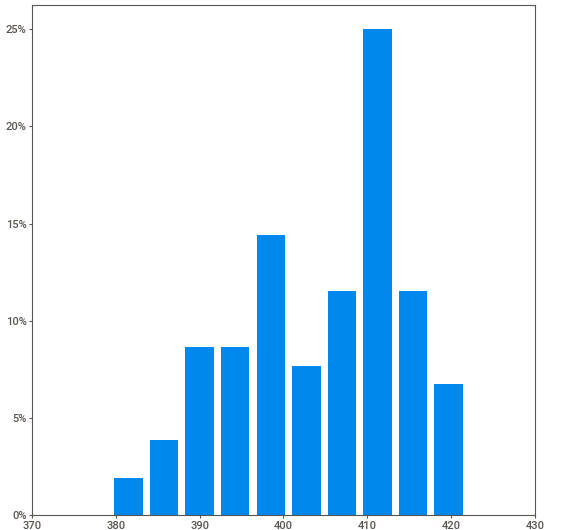
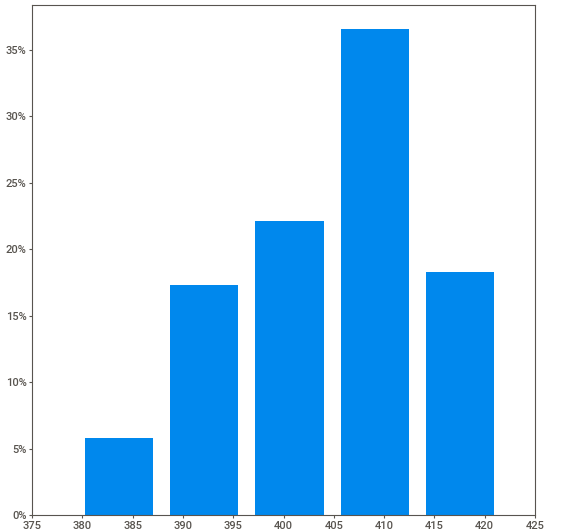
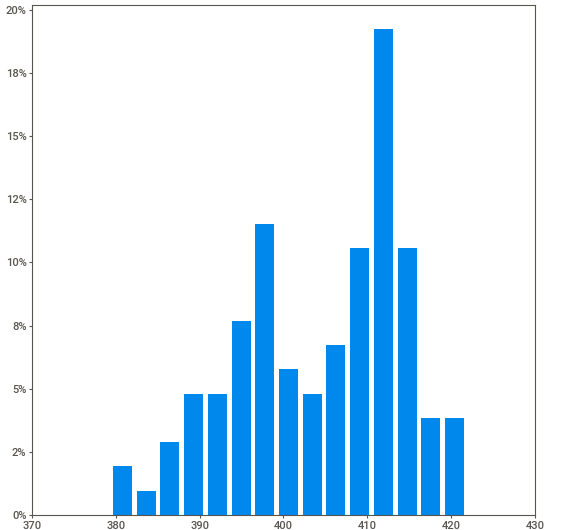
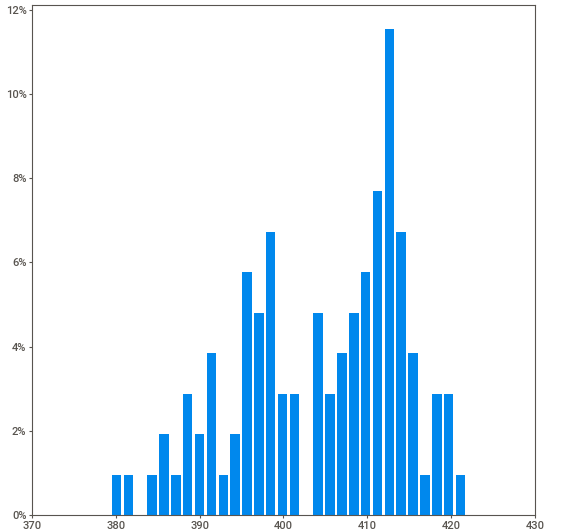
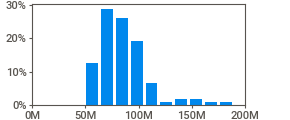
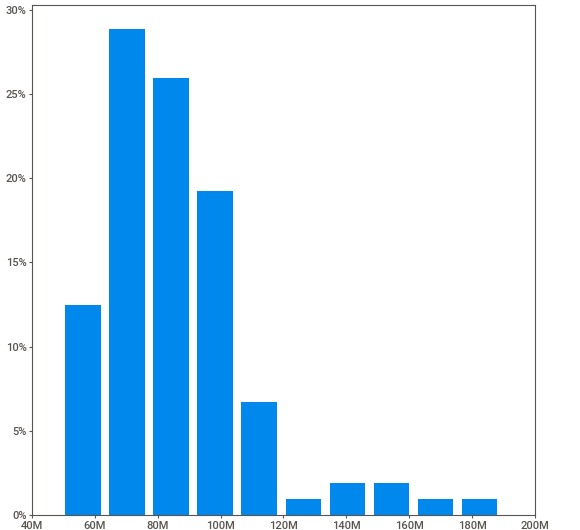
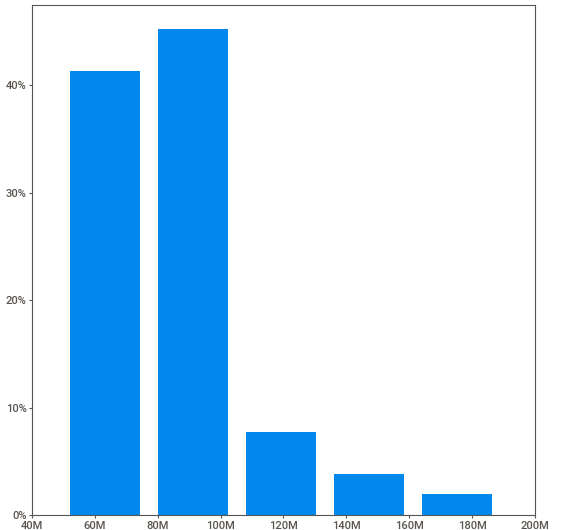
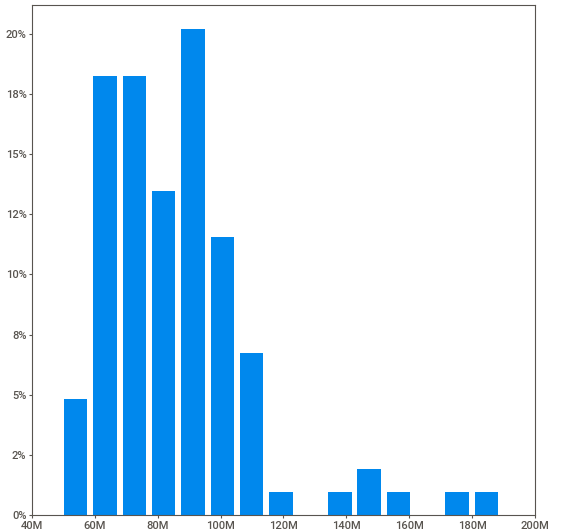
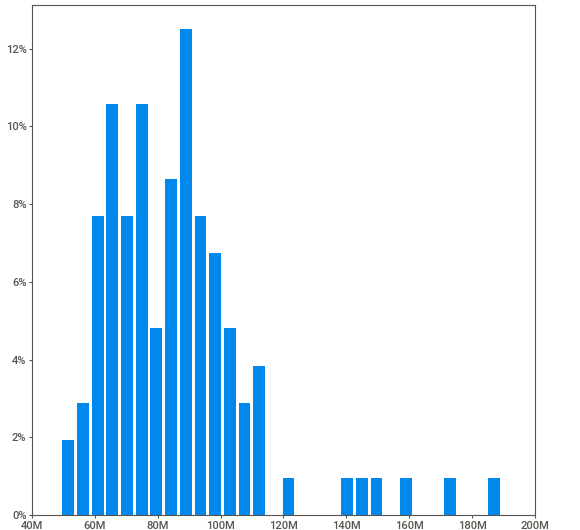
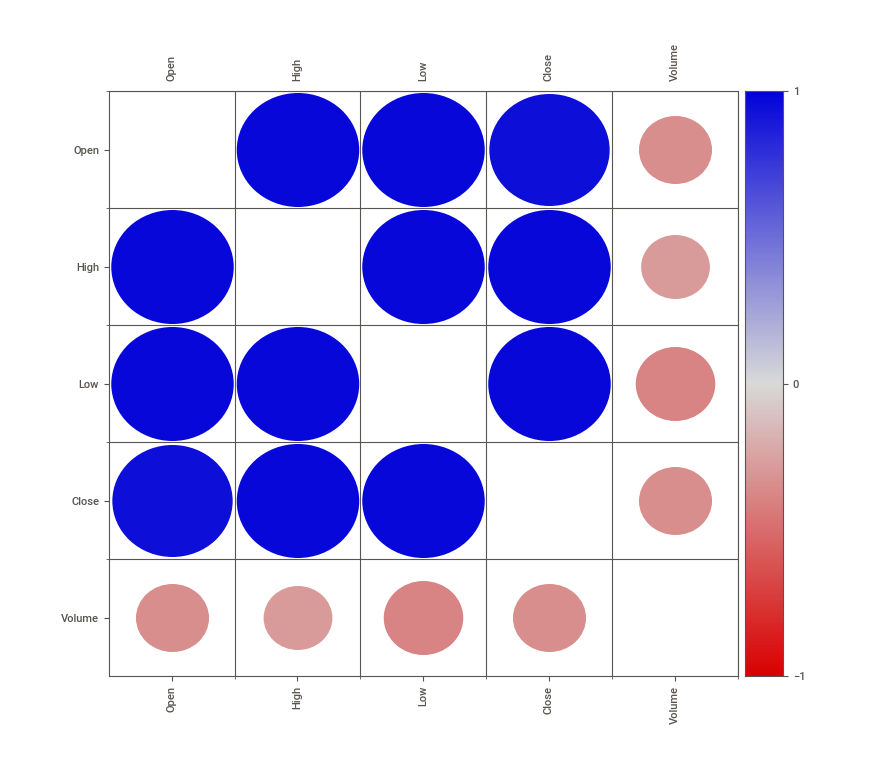
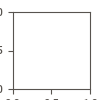

In [ ]:
# Display the SweetViz output
import IPython
IPython.display.HTML(filename='sweetviz_report.html')

### sweetviz dataset comparison

One nice additional functionality that Sweet-Viz is the ability to compare different samples or versions of the data. See more in this [article](https://towardsdatascience.com/3-tools-for-fast-data-profiling-5bd4e962e482)

In [ ]:
# Get stock OHLC data
df_aapl = web.DataReader('AAPL', 'stooq', start='01/01/2023', end='06/01/2023')
df_amzn = web.DataReader('AMZN', 'stooq', start='01/01/2023', end='06/01/2023')

In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sv

my_report = sv.compare([df_aapl, 'Apple'],[df_amzn, 'Amazon'], 'Close')
my_report.show_html(filepath='sweetviz_comparison_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



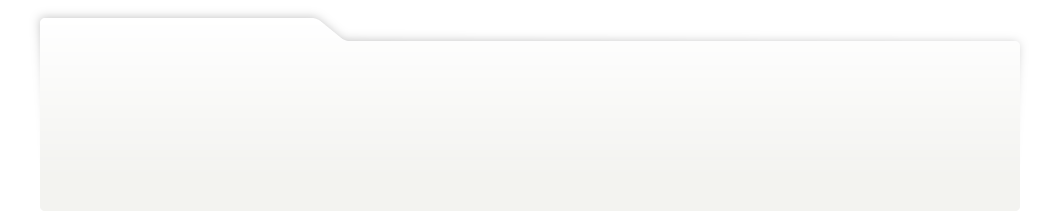
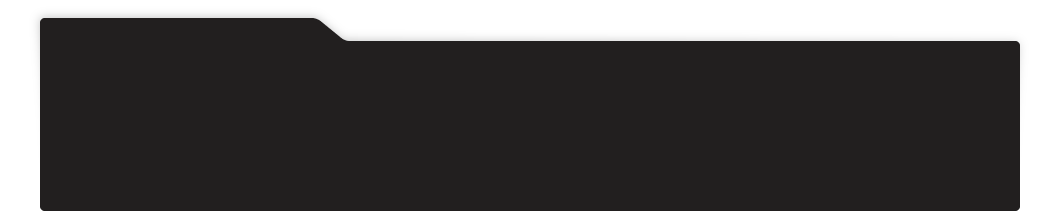
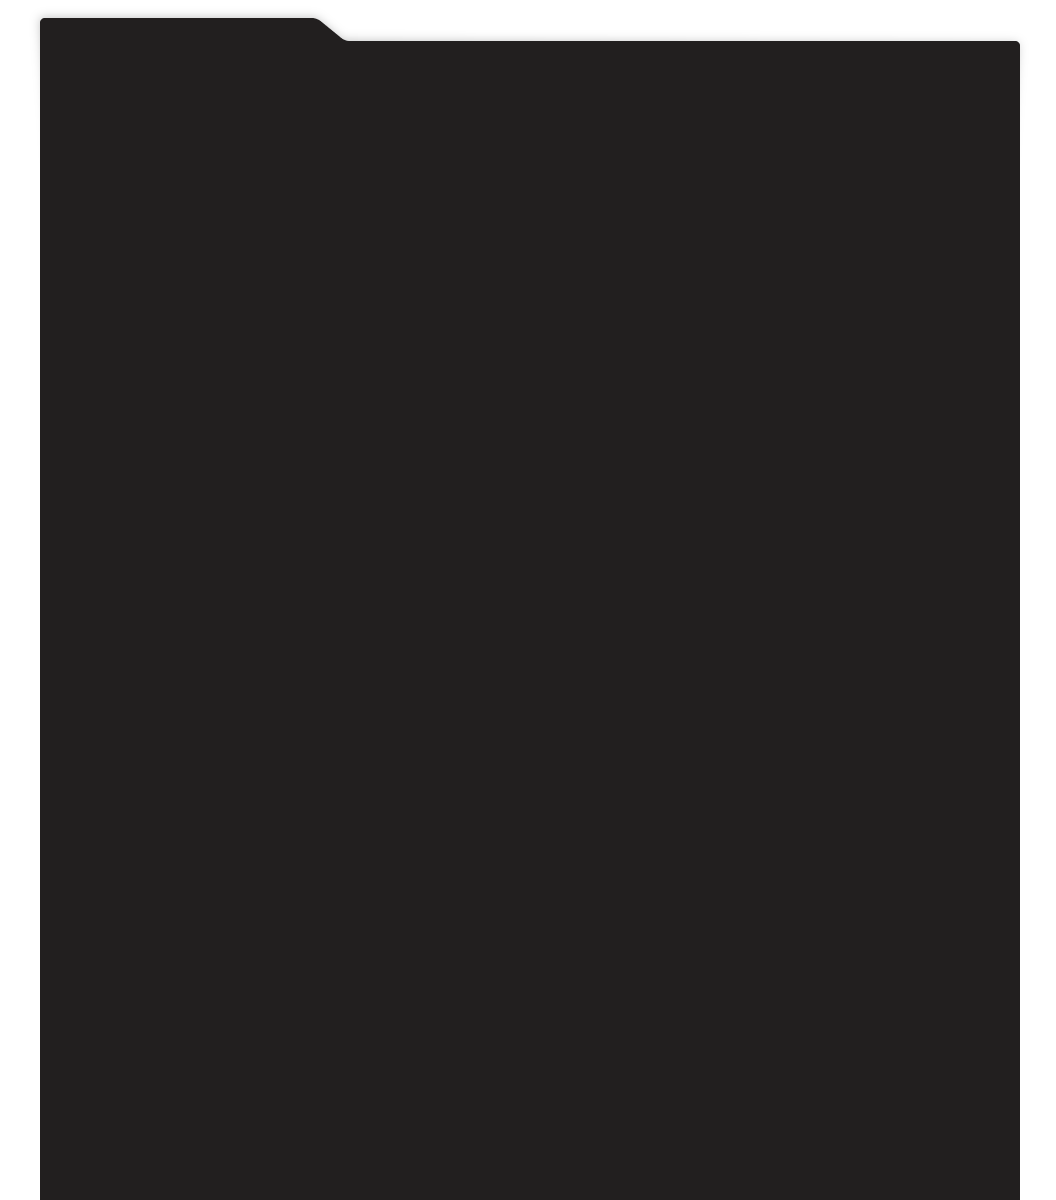
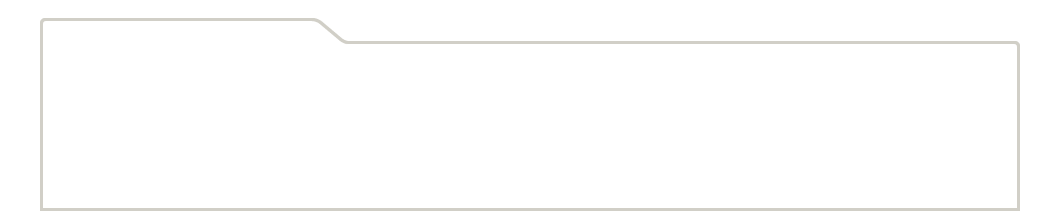
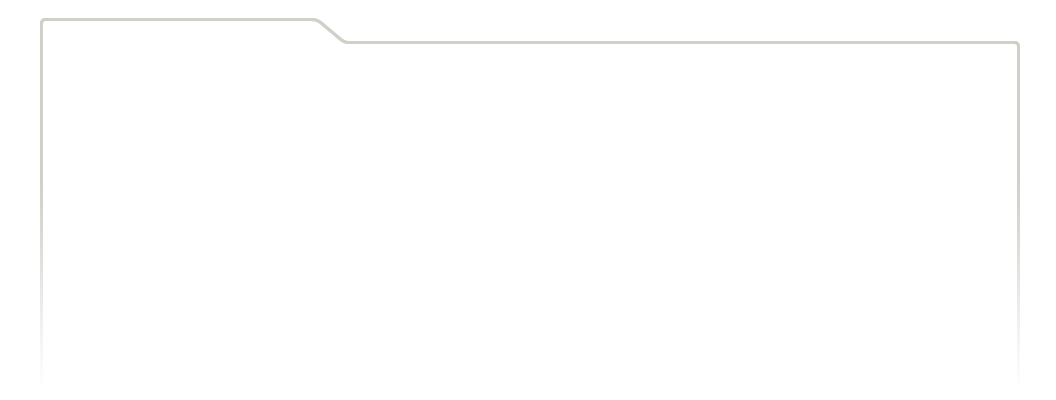
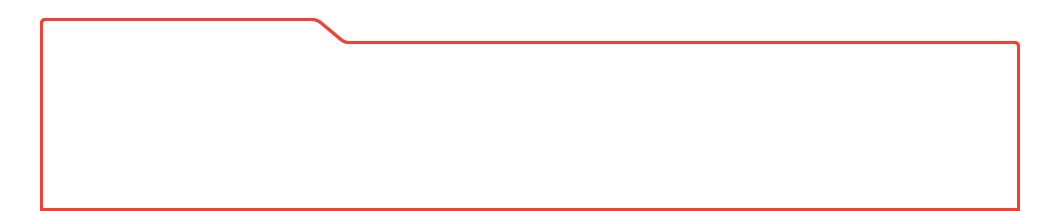
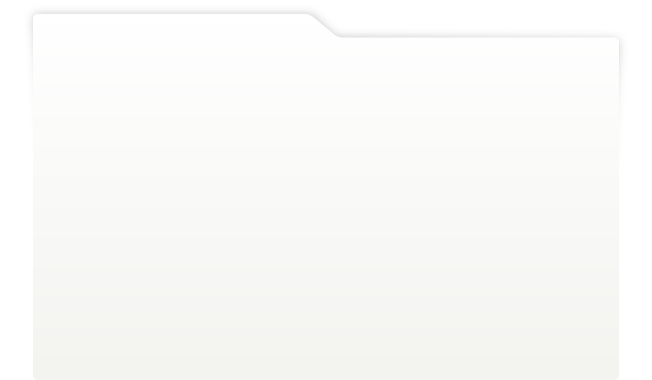
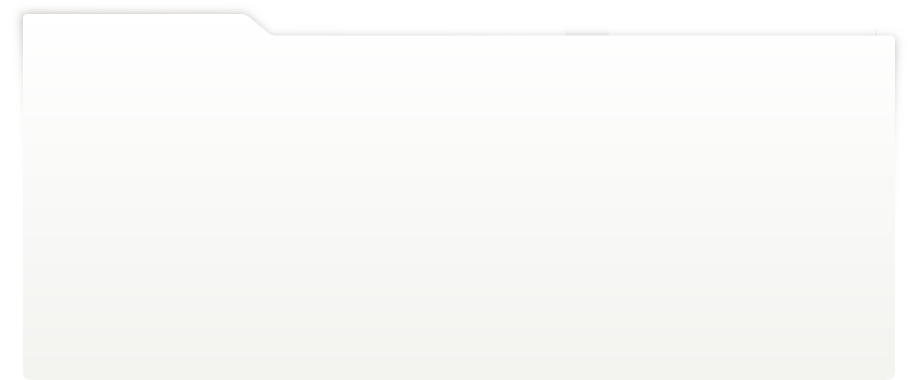
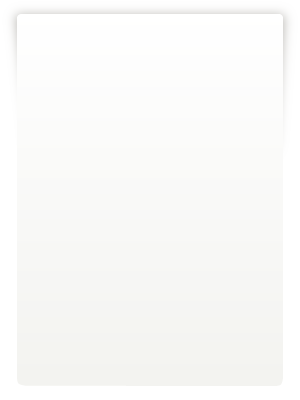
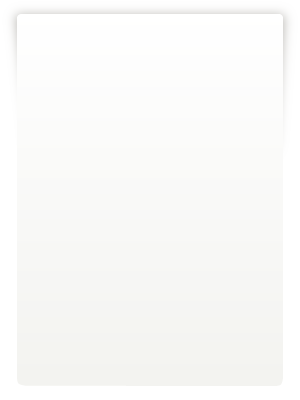
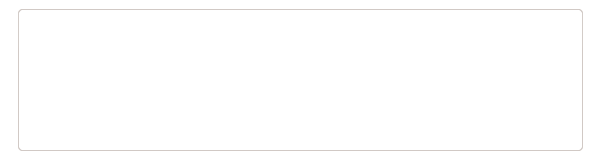
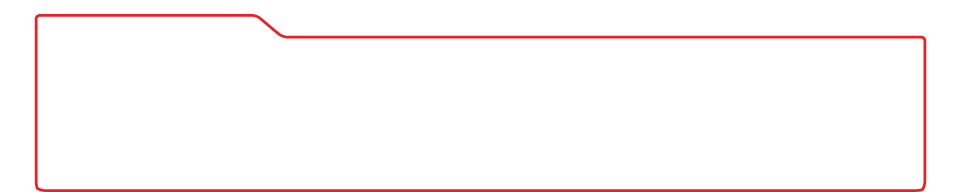
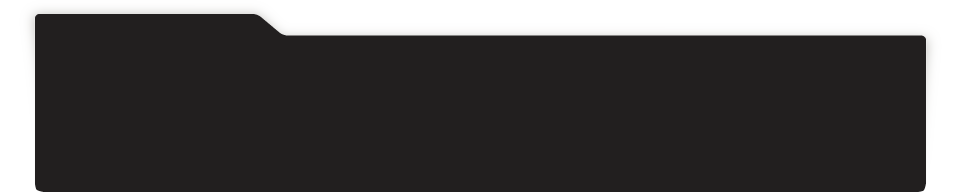
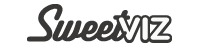
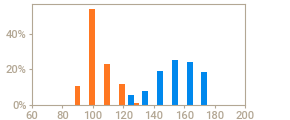
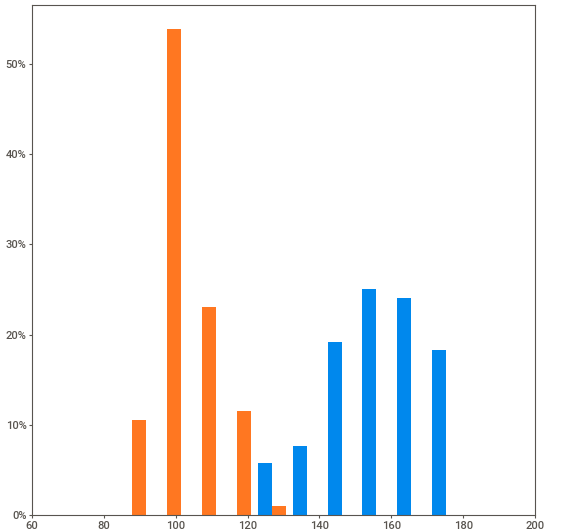
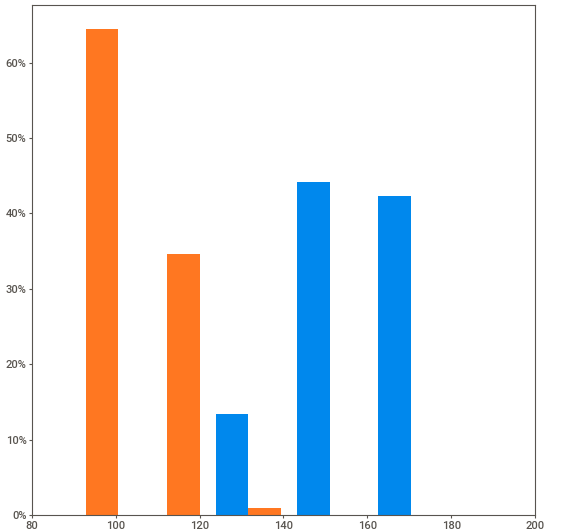
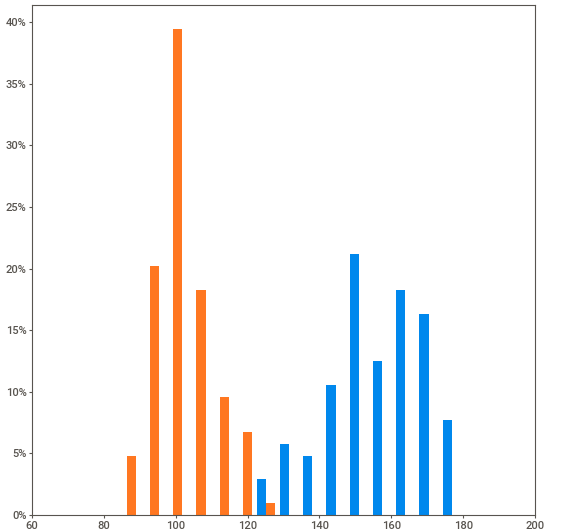
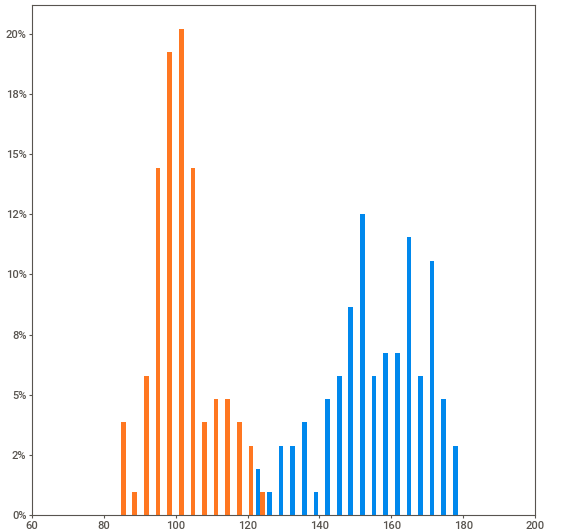
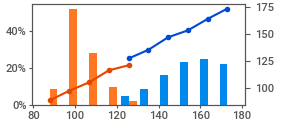
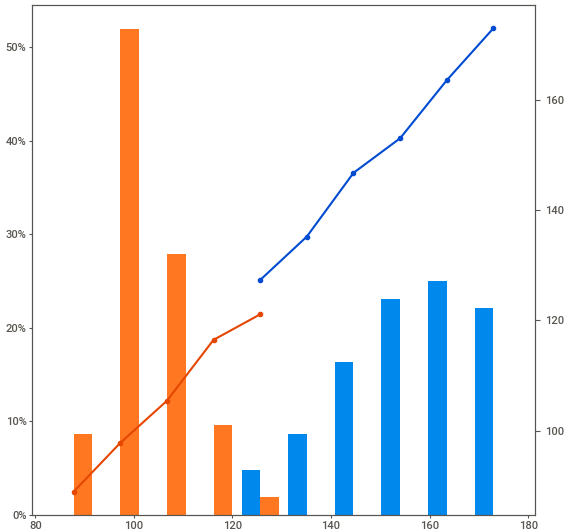
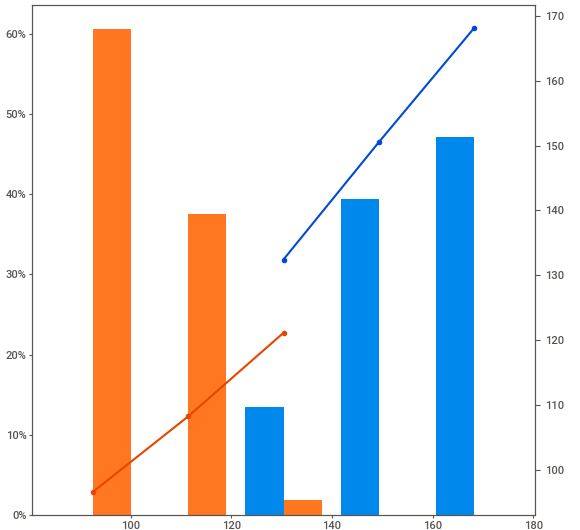
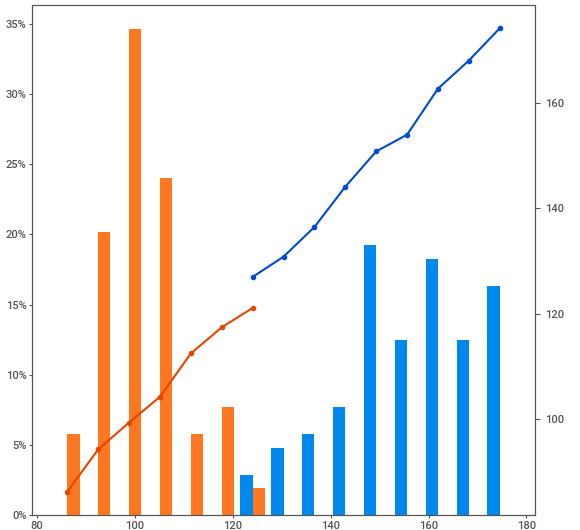
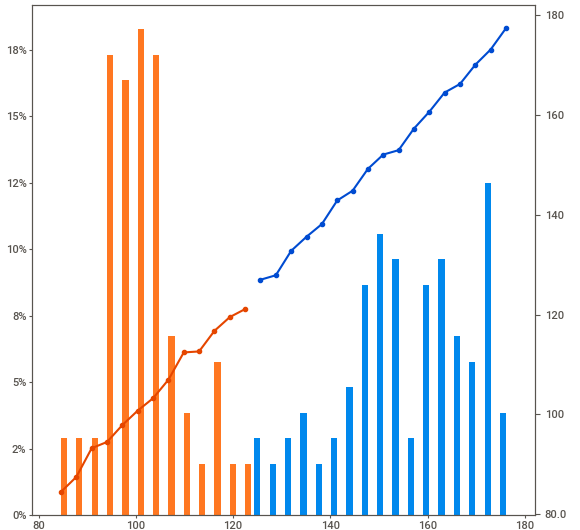
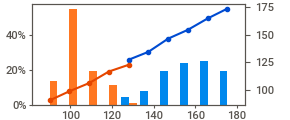
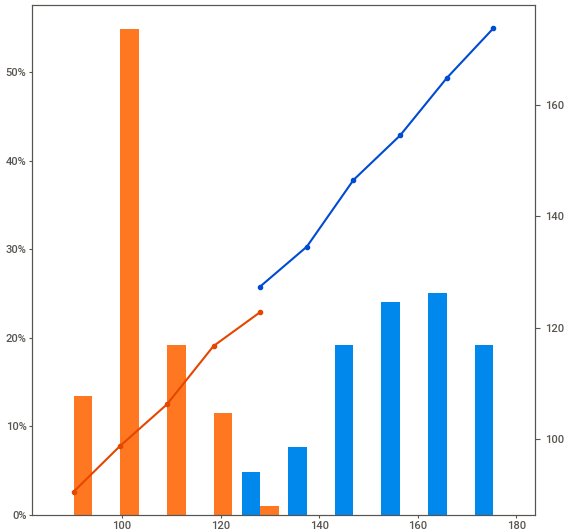
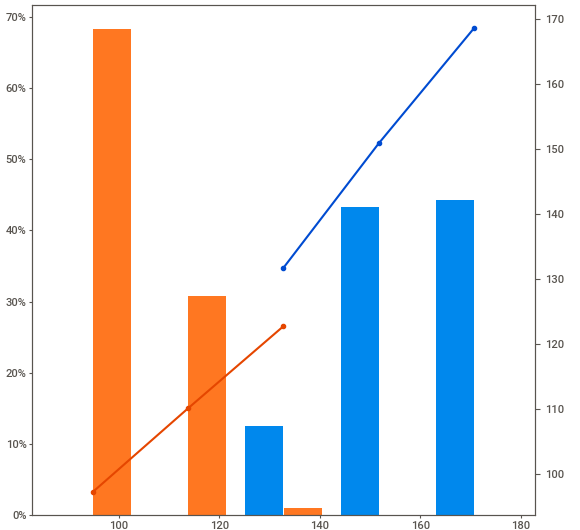
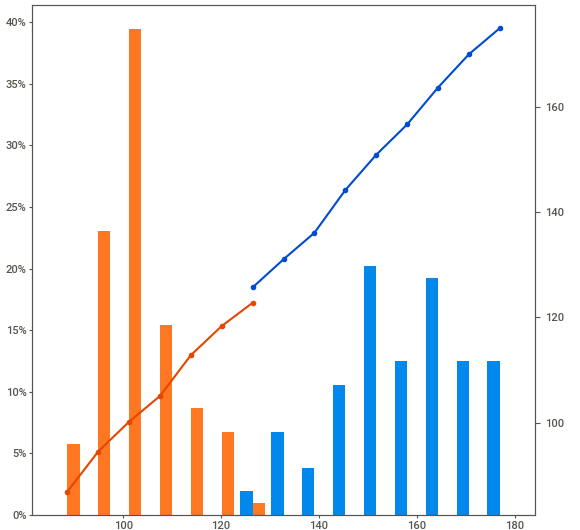
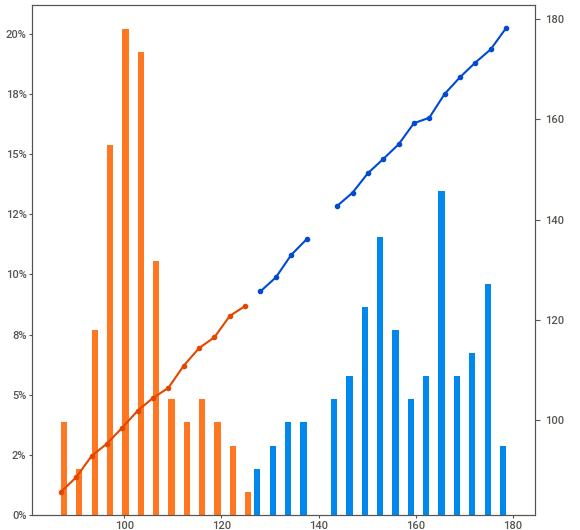
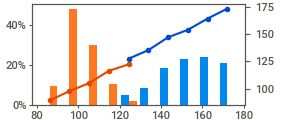
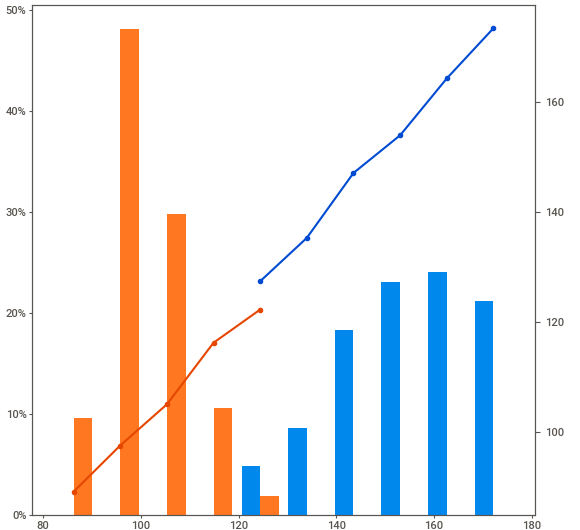
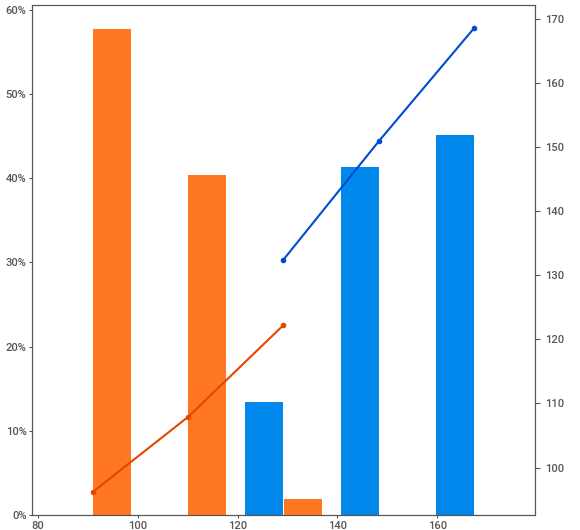
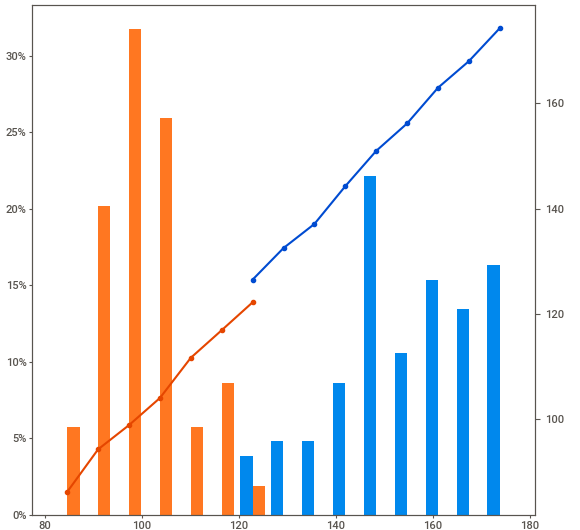
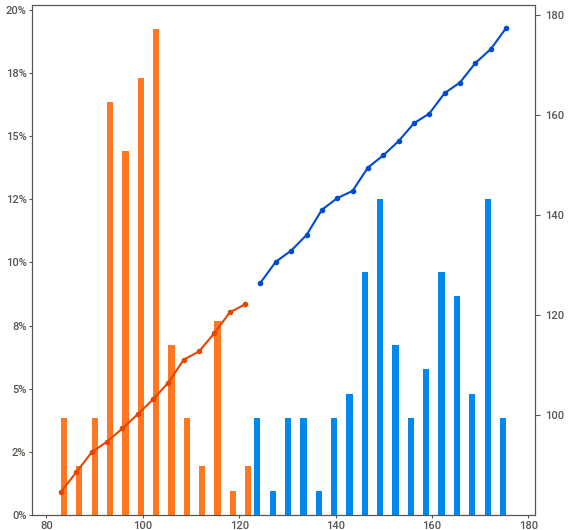
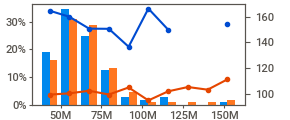
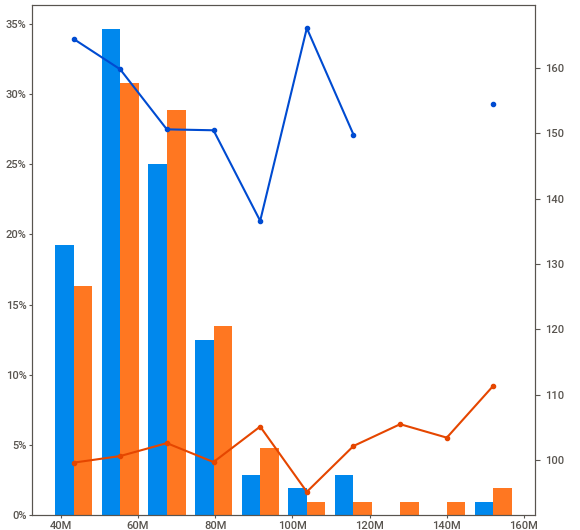
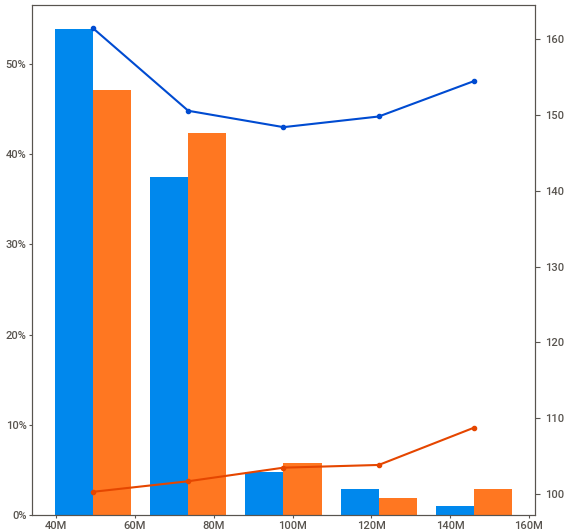
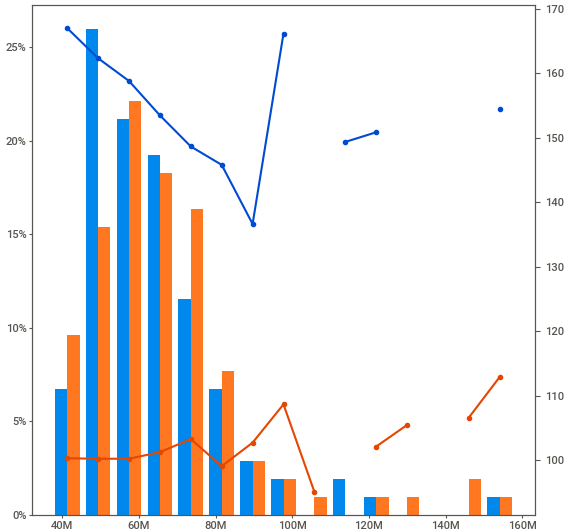
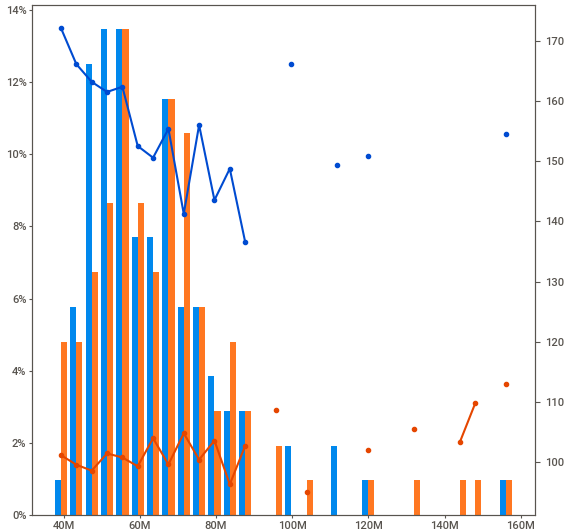
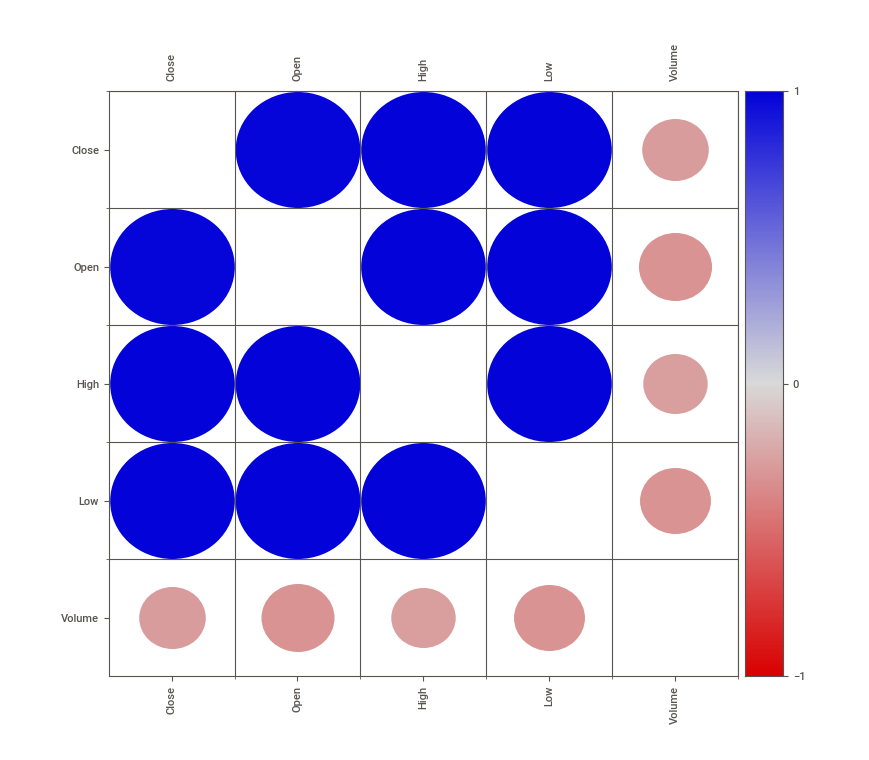
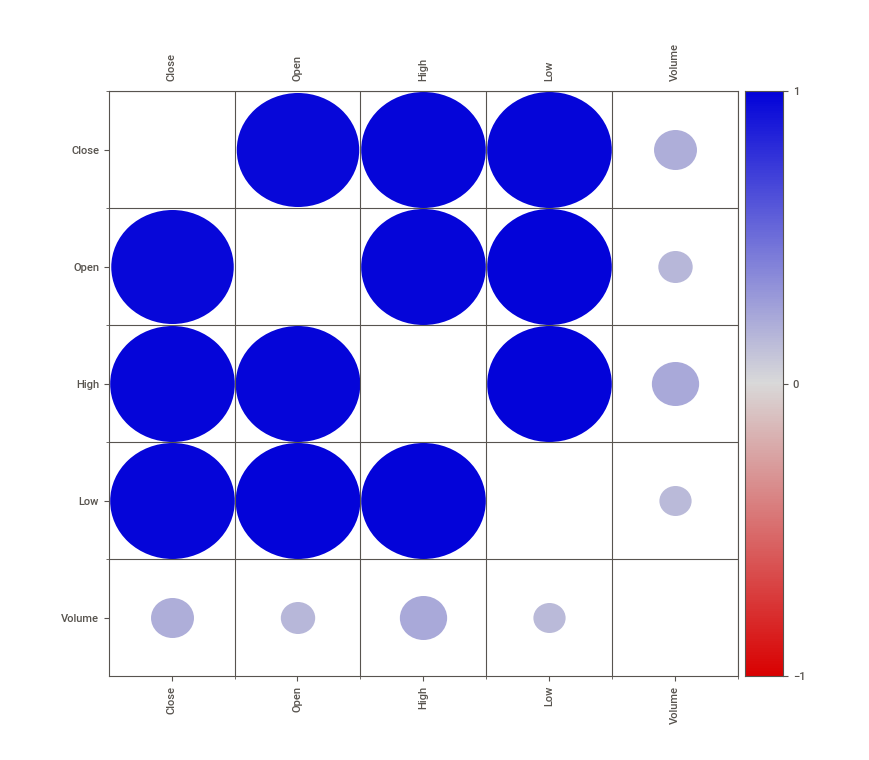

In [ ]:
import IPython
IPython.display.HTML(filename='/content/sweetviz_comparison_report.html')

# Visualizing Data

We have shown an option to use Google Suggested Chart and `google.colab.autoviz` below. There are several community notebooks we can reference for data visualization.
- [Charts in Colaboratory.ipynb](https://colab.research.google.com/notebooks/charts.ipynb)
- [autoviz_demo.ipynb](https://colab.research.google.com/github/Data-Centric-AI-Community/awesome-data-centric-ai/blob/master/medium/data-profiling-tools/notebooks/autoviz_demo.ipynb)
- [altair.ipynb](https://colab.research.google.com/notebooks/snippets/altair.ipynb)



## Colab charts suggestion

With any dataframe created in Google Colab, we can click the suggested charts icon to view a selection of charts for the given dataset. From there, we can click a chart to view the code needed to create it.


In [ ]:
import pandas as pd
import pandas_datareader.data as web

# Get stock OHLC data
df_ohlc = web.DataReader('SPY', 'stooq', start='01/01/2023', end='09/01/2023')

### Using AutoViz

In [ ]:
df_ohlc

Open    High       Low   Close     Volume
Date                                                   
2023-09-01  453.17  453.67  449.6800  451.19   58944098
2023-08-31  451.65  452.83  450.1600  450.35   66084563
2023-08-30  449.51  451.67  448.7800  451.01   69053911
2023-08-29  442.65  449.45  442.4600  449.16   83081916
2023-08-28  442.24  443.40  439.9728  442.76   61595393
...            ...     ...       ...     ...        ...
2023-01-09  390.37  393.70  387.6700  387.86   73978071
2023-01-06  382.61  389.25  379.4127  388.08  104189603
2023-01-05  381.72  381.84  378.7600  379.38   76970456
2023-01-04  383.18  385.88  380.0000  383.76   85934098
2023-01-03  384.37  386.43  377.8310  380.82   74850731

[168 rows x 5 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_ohlc, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_ohlc, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_ohlc, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_ohlc, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_ohlc, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_ohlc, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_ohlc, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_ohlc, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_ohlc, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close'], ['Close', 'Volume']]], **{})
chart

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_ohlc, *[[['Close', 'Volume']]], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_ohlc, *['Close'], **{})
chart

### Common Charts

#### Correlation Matrix Plot

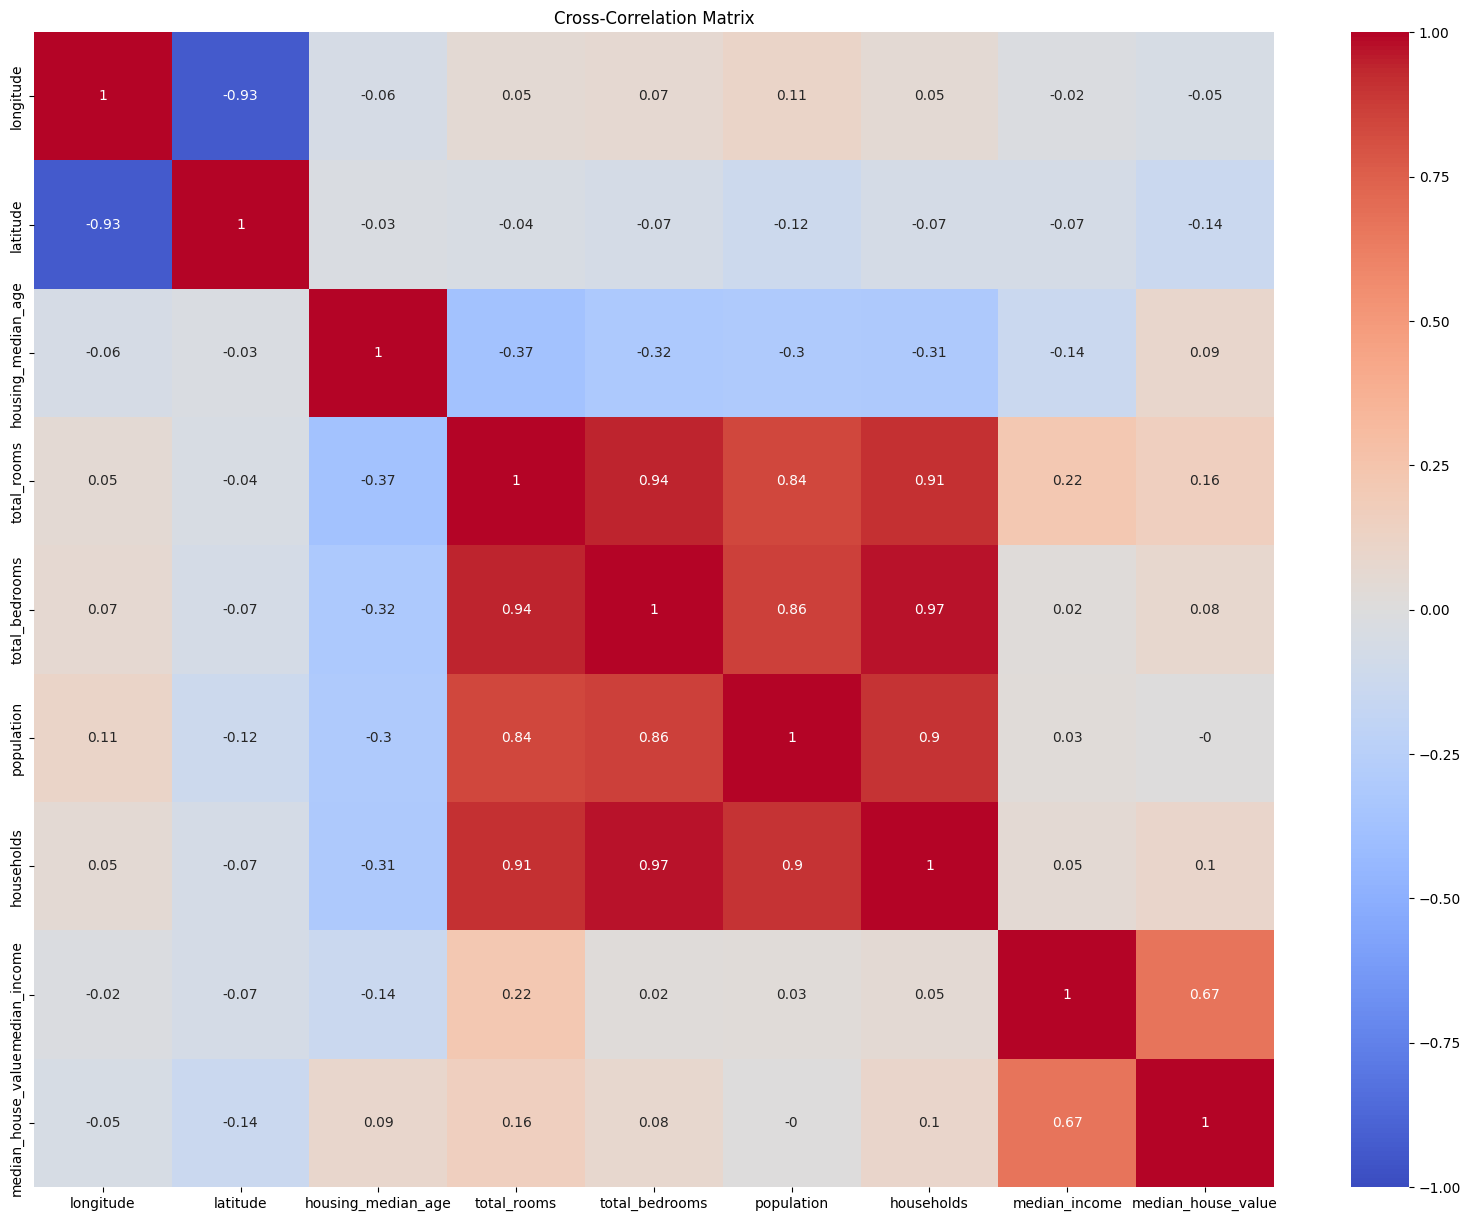

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get dataframe
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix = corr_matrix.round(2)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cross-Correlation Matrix')
plt.show()

# Resources

**Setting Up Google Colab**
- [Welcome To Colaboratory.ipynb](https://colab.research.google.com/#scrollTo=lSrWNr3MuFUS) **
- [Overview of Colaboratory Features.ipynb](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
- [IPythonMagic.ipynb](https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/language/IPythonMagic.ipynb)
- [Data Table Display.ipynb](https://colab.research.google.com/notebooks/data_table.ipynb)

**Importing & Exporting Data**
- [Getting started with BigQuery.ipynb](https://colab.research.google.com/notebooks/bigquery.ipynb) **
- [External data: Local Files, Drive, Sheets, and Cloud Storage.ipynb](https://colab.research.google.com/notebooks/io.ipynb) **

**Profiling Data**
- [Google Colab | Exploratory Data Analysis.ipynb](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)
- [Medium: 3 Tools for Fast Data Profiling](https://towardsdatascience.com/3-tools-for-fast-data-profiling-5bd4e962e482)
- [StackOverflow | Installing jupyter-contrib-nbextension on Google Colab](https://stackoverflow.com/questions/52292456/installing-jupyter-contrib-nbextension-on-google-colab)
- [StackOverflow | Pandas Profiling error within google colab](https://stackoverflow.com/questions/61283382/pandas-profiling-error-within-google-colab)
- [Kaggle | EDA Using sweetviz and autoviz](https://www.kaggle.com/code/rishabh6377/eda-using-sweetviz-and-autoviz)
- [Google Colab | autoviz_demo.ipynb](https://colab.research.google.com/github/Data-Centric-AI-Community/awesome-data-centric-ai/blob/master/medium/data-profiling-tools/notebooks/autoviz_demo.ipynb#scrollTo=yTbi5YqRhD2b)

**Visualizing Data**
- [Github | AutoViz](https://github.com/AutoViML/AutoViz)
- [PyPI Dos | AutoViz](https://pypi.org/project/autoviz/)
- [Altair Chart Gallery](https://altair-viz.github.io/gallery/)

**Useful Notebooks**
- [Welcome To Colaboratory](https://colab.research.google.com/)
- [Google Colab Notebook Library](https://colab.google/notebooks/)
- [colab-tutorial.ipynb](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb). From Stanford's CS231 class on Python.
- [Advanced Python Tutorial.ipynb](https://colab.research.google.com/drive/1gCqFEquqNvEoTDX3SNhR2PZkXWPHKXnc?usp=sharing)
- [bqml-online-prediction.ipynb](https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/bigquery_ml/bqml-online-prediction.ipynb). BigQueryML + Vertex AI used for churn prediction from Google Analytics event-level data.